# Intro to k-NN

### Working with Sample Fruits Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# load data
fruits = pd.read_table('../data/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
fruits.shape

(59, 7)

## Create a Train / test split

In [4]:
X = fruits[['height','width','mass','color_score']]

y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [5]:
X_train.head()

,height,width,mass,color_score
27,9.2,7.5,204,0.77
47,9.7,7.3,196,0.72
18,7.1,7.5,162,0.83
39,7.4,6.8,144,0.75
56,8.1,5.9,116,0.73


In [6]:
y_train.head()

27    3
47    4
18    1
39    3
56    4
Name: fruit_label, dtype: int64

In [7]:
X_test.head(2)

,height,width,mass,color_score
49,8.7,5.8,132,0.73
9,7.0,7.4,172,0.89


In [8]:
y_test.head(2)

49    4
9     1
Name: fruit_label, dtype: int64

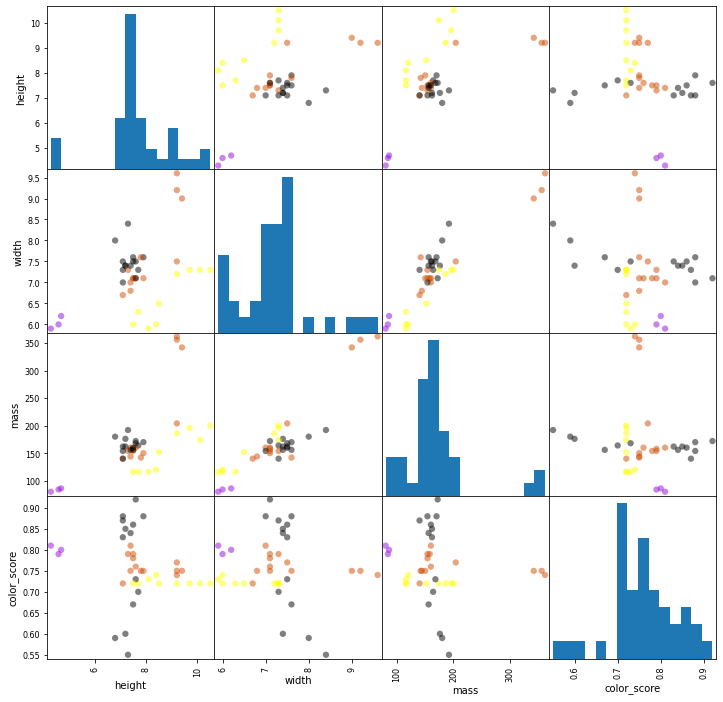

In [9]:
from matplotlib import cm 
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train,
                                     marker='o',s=40,hist_kwds={'bins':15},
                                     figsize=(12,12),cmap=cmap)

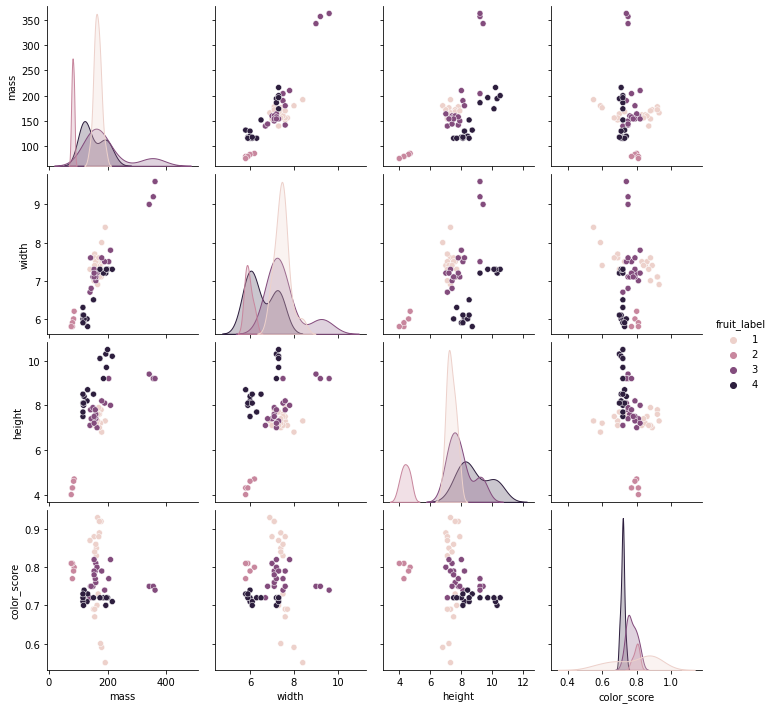

In [10]:
sns.pairplot(fruits,hue='fruit_label')

# using KNN Classification 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

#### Create classifyer object

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

#### Train the classifyer (fit the estimator)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
pred = knn.predict(X_test)

## Estimate the Accuray

In [15]:
knn.score(X_test, y_test)

0.6

## Test a prediction on a sample

In [16]:
X_sample = np.array([[7.0,7.4,172,0.89]]) #

pred_sample = knn.predict(X_sample)

In [17]:
fruits['fruit_name'][pred_sample]

1    apple
Name: fruit_name, dtype: object

## Evaluate model

In [18]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       1.00      1.00      1.00         2
           3       0.25      0.17      0.20         6
           4       0.71      0.71      0.71         7

    accuracy                           0.60        20
   macro avg       0.63      0.67      0.65        20
weighted avg       0.57      0.60      0.58        20



In [19]:
print (confusion_matrix(y_test,pred))

[[4 0 1 0]
 [0 2 0 0]
 [3 0 1 2]
 [0 0 2 5]]


#### Test Accuracy score

- right predictions

In [20]:
np.mean(pred == y_test)

0.6

- test set accuracy

In [21]:
knn.score(X_test,y_test)

0.6

## Visual Plots of k-NN classifyers on sample fruit data


Fruits in the dataset

In [22]:
print (fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [23]:
from adspy_shared_utilities import plot_fruit_knn

#### Decision Boundaries with K=30

/Users/RobinKiplangat/projects/data_school/applied_ML-Coursera/Module_1-Intro_to_SciKit_Learn/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


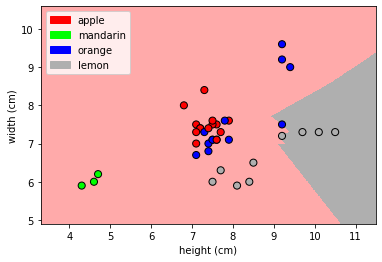

In [25]:
plot_fruit_knn(X_train,y_train, 30, 'uniform')
# uniform - weight method. could take 'distance'


#### Decision Boundaries with K=10

/Users/RobinKiplangat/projects/data_school/applied_ML-Coursera/Module_1-Intro_to_SciKit_Learn/adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


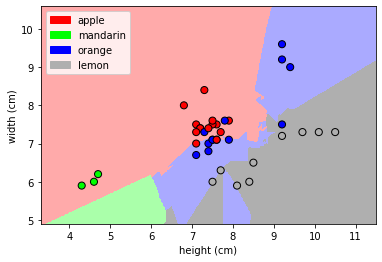

In [26]:
plot_fruit_knn(X_train,y_train, 10, 'uniform')

#### Decision Boundaries with K=1

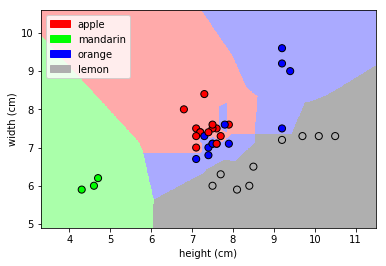

In [65]:
plot_fruit_knn(X_train,y_train, 1, 'uniform')

## Choosing the appropriate K value

In [27]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

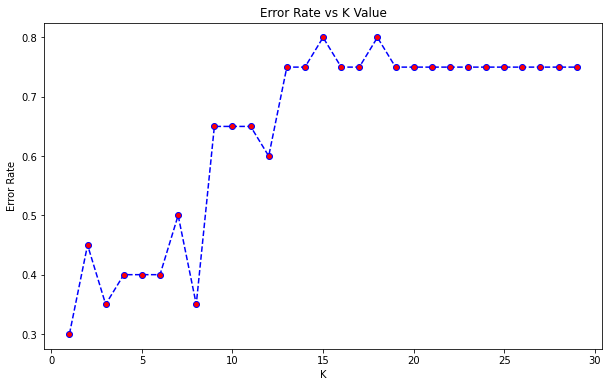

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='b',
         ls='--',marker='o',markerfacecolor='r')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Classify with the best value of k

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

In [30]:
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67         5
           2       1.00      1.00      1.00         2
           3       0.60      0.50      0.55         6
           4       0.83      0.71      0.77         7

    accuracy                           0.70        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.71      0.70      0.70        20



In [31]:
np.mean

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>